# Lab program 9
## Develop a program to implement the Naive Bayesian classifier considering Olivetti Face Data set for training. Compute the accuracy of the classifier, considering a few test data sets. 

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = data.data, data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [5]:
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0)) # Fixed line to avoid warning
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1

In [6]:
missing_labels = set(np.unique(y_test)) - set(np.unique(y_pred))
if missing_labels:
    print(f"\nLabels not predicted at all: {missing_labels}")
# Cross-validation accuracy
cv_accuracy = cross_val_score(gnb, X, y, cv=5).mean()
print(f'\nCross-validation accuracy: {cv_accuracy * 100:.2f}%')


Labels not predicted at all: {np.int64(3)}

Cross-validation accuracy: 87.25%


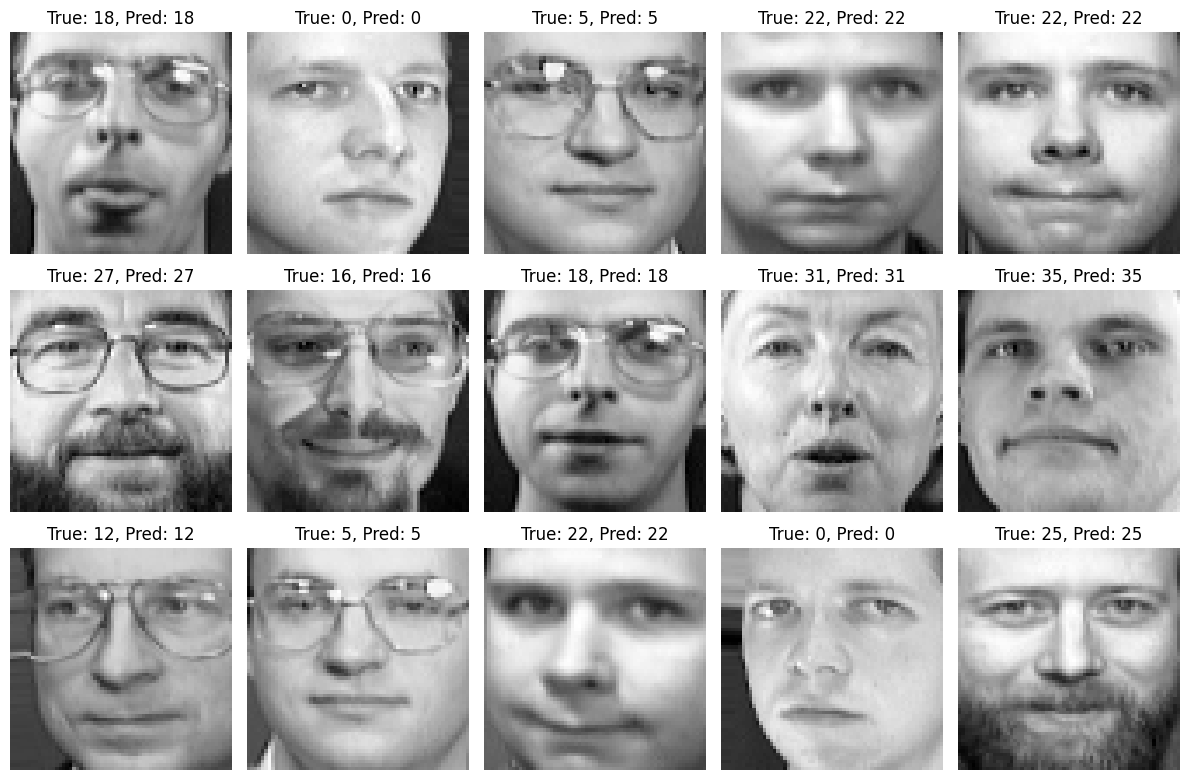

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray)
    ax.set_title(f"True: {label}, Pred: {prediction}")
    ax.axis('off')
plt.tight_layout()
plt.show()